In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
housing_df = pd.read_csv('housing.csv', header = None)
housing_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X_train, X_test, y_train, y_test = train_test_split(housing_df.values[:, :-1],
                                                    housing_df.values[:, -1],
                                                    test_size=0.2,
                                                    random_state = 0)
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train, X_test = (X_train - mean)/std, (X_test-mean)/std
# X_test = np.column_stack( (np.ones((X_test.shape[0], 1)), X_test) )

$\hat{y} = X.w + b$

$\overrightarrow{w} = (w_0, w_1,...,w_d)$

$J(\overrightarrow{w}) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$

In [4]:
from linear_regression import LinearRegression

In [6]:
## Closed-Form Solution
$X^T.X$

SyntaxError: invalid syntax (2742247067.py, line 2)

In [5]:
lr = LinearRegression(optimizer=None)
lr.fit(X_train, y_train)

y_hat_test = lr.predict(X_test)

print(f'rmse: {lr.rmse(y_test, y_hat_test)}')
print(f'mse: {lr.mse(y_test, y_hat_test)}') 

Data matrix is Full-rank
Data matrix is not low rank
rmse: 5.783509053791393
mse: 33.44897697528702


In [6]:
lr = LinearRegression(optimizer=None, lambda_ = 1)
lr.fit(X_train, y_train)

y_hat_test = lr.predict(X_test)

print(f'rmse: {lr.rmse(y_test, y_hat_test)}')
print(f'mse: {lr.mse(y_test, y_hat_test)}') 

Data matrix is Full-rank
Data matrix is not low rank
rmse: 5.793846834702777
mse: 33.56866114399539


In [7]:
lr = LinearRegression(learning_rate=0.3,
                      optimizer='gd',
                      loss = 'mse')

lr.fit(X_train, y_train)

y_hat_test = lr.predict(X_test)

print(f'rmse: {lr.rmse(y_test, y_hat_test)}')
print(f'mse: {lr.mse(y_test, y_hat_test)}') 

(14,)


  2%|▏         | 81/5000 [00:00<00:00, 80967.26it/s]

The model stopped learning - Converged in 81 steps(iterations)
rmse: 5.808750643468277
mse: 33.741584037993114


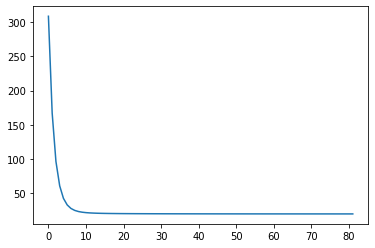

In [8]:
plt.plot(lr.errors)